First few rows of the dataset:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Data types of the features:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
Si

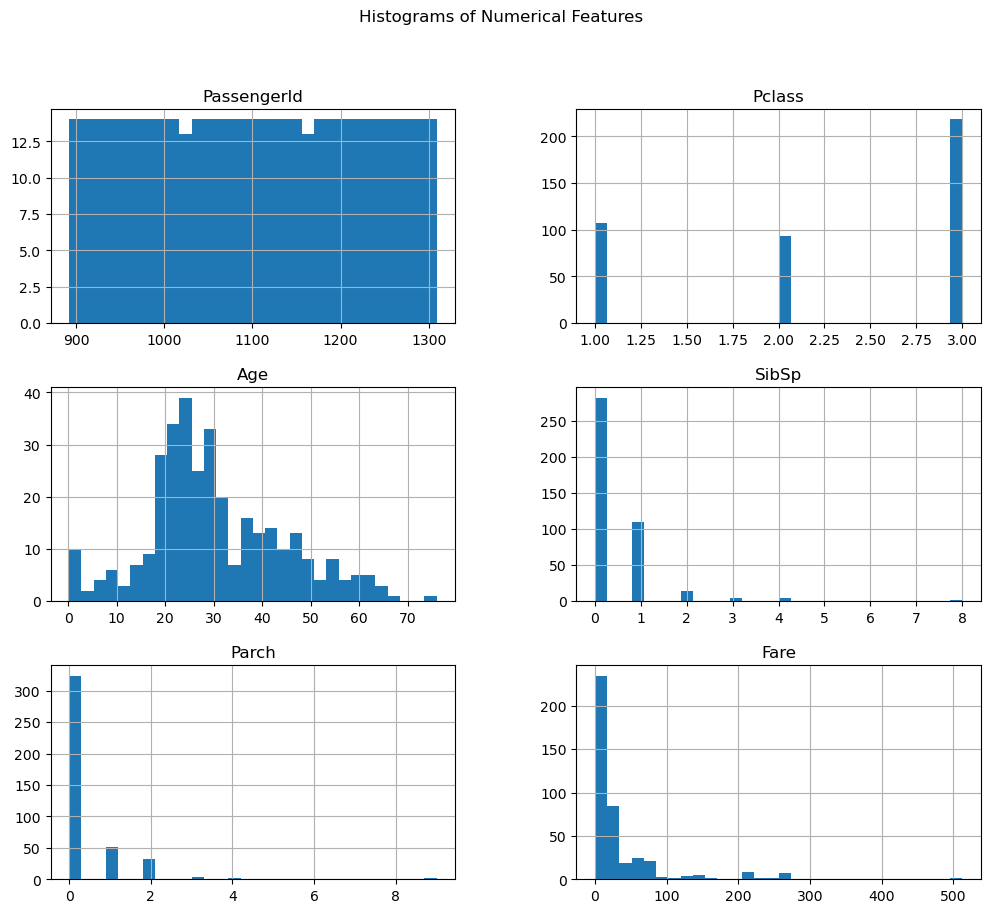

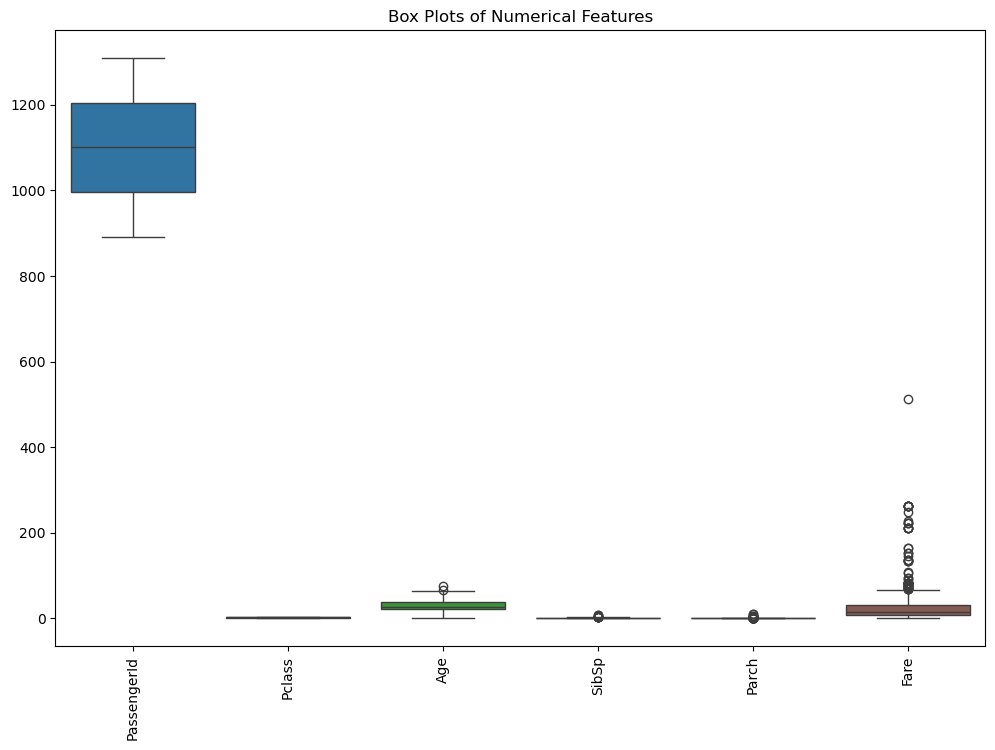

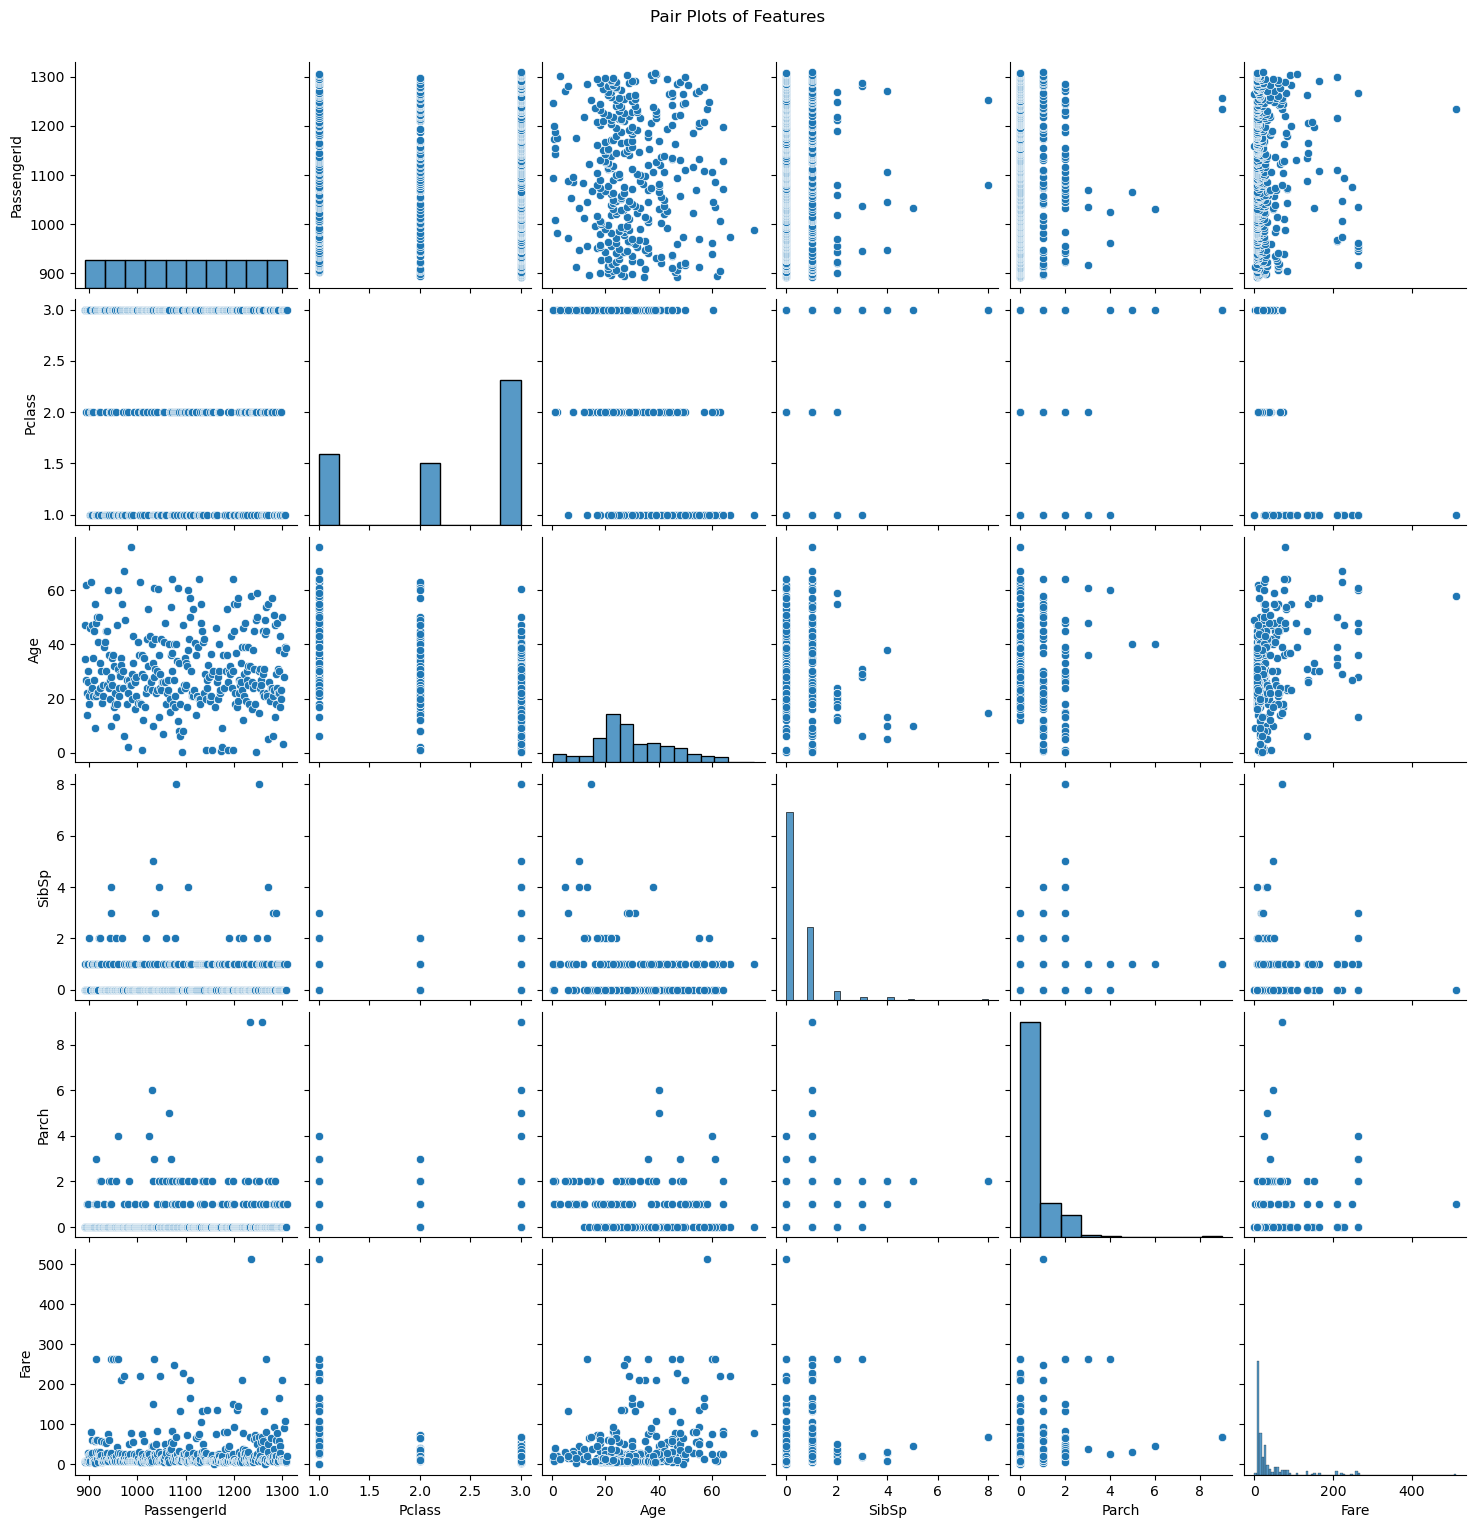

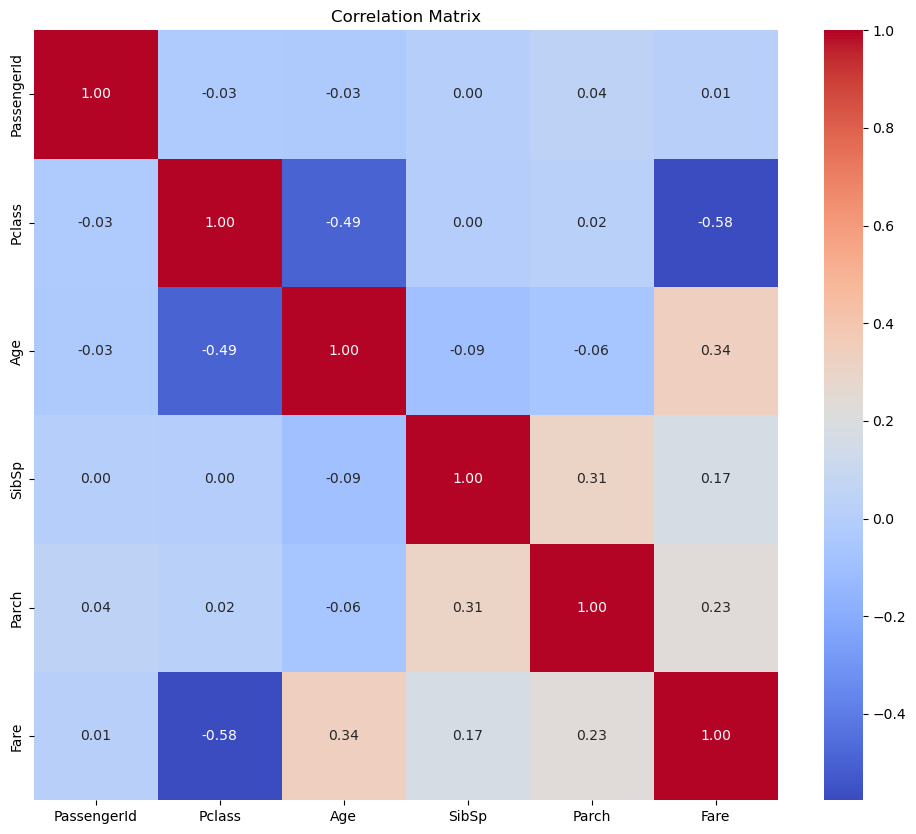

In [1]:
# Data Exploration


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\mukes\\Downloads\\Logistic Regression\\Logistic Regression\\Titanic_test.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Examine the features and their types
print("\nData types of the features:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Histograms for each numerical feature
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Box plots for numerical features to visualize distributions and outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title('Box Plots of Numerical Features')
plt.show()

# Select only numerical columns for pair plots
numeric_df = df.select_dtypes(include=[np.number])
sns.pairplot(numeric_df)
plt.suptitle('Pair Plots of Features', y=1.02)
plt.show()

# Analyze correlations
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [2]:
# Data Preprocessing


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\mukes\\Downloads\\Logistic Regression\\Logistic Regression\\Titanic_test.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Examine the features and their types
print("\nData types of the features:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Data Preprocessing

# a. Handle missing values

# Impute missing Age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing Embarked values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop or fill missing values in 'Fare' if needed (here we drop for simplicity)
df['Fare'].fillna(df['Fare'].median(), inplace=True)  # If 'Fare' has missing values

# Check if there are any missing values left
print("\nMissing values after imputation:")
print(df.isnull().sum())

# b. Encode categorical variables

# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Optionally encode 'Pclass' if needed (usually it can be treated as a numerical variable)
# df['Pclass'] = df['Pclass'].astype('category')
# df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)

# Display the updated DataFrame
print("\nData after encoding categorical variables:")
print(df.head())

# Summary statistics after preprocessing
print("\nSummary statistics after preprocessing:")
print(df.describe(include='all'))


First few rows of the dataset:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Data types of the features:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
Si

C:\Users\mukes\AppData\Local\Temp\ipykernel_14848\405709607.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\mukes\AppData\Local\Temp\ipykernel_14848\405709607.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [3]:
# Model Building


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the training dataset
train_df = pd.read_csv("C:\\Users\\mukes\\Downloads\\Logistic Regression\\Logistic Regression\\Titanic_train.csv")

# Data Preprocessing
# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# Drop non-numeric or unnecessary columns
columns_to_drop = ['Name', 'Ticket', 'Cabin']  # Dropping columns that won't be used in the model
train_df.drop(columns=columns_to_drop, inplace=True)

# One-hot encode the categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
X = train_df.drop(columns=['Survived'])  # Features
y = train_df['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set (optional, if you want to check predictions)
y_pred = model.predict(X_test)

# Print the first few predictions (optional)
print("Predictions on the test set:")
print(y_pred[:10])




Predictions on the test set:
[0 0 0 1 1 1 1 0 1 1]


C:\Users\mukes\AppData\Local\Temp\ipykernel_14848\3024526163.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\mukes\AppData\Local\Temp\ipykernel_14848\3024526163.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

C:\Users\mukes\AppData\Local\Temp\ipykernel_14848\1152799929.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\mukes\AppData\Local\Temp\ipykernel_14848\1152799929.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Accuracy: 0.80
Precision: 0.77
Recall: 0.73
F1 Score: 0.75
ROC AUC Score: 0.88


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


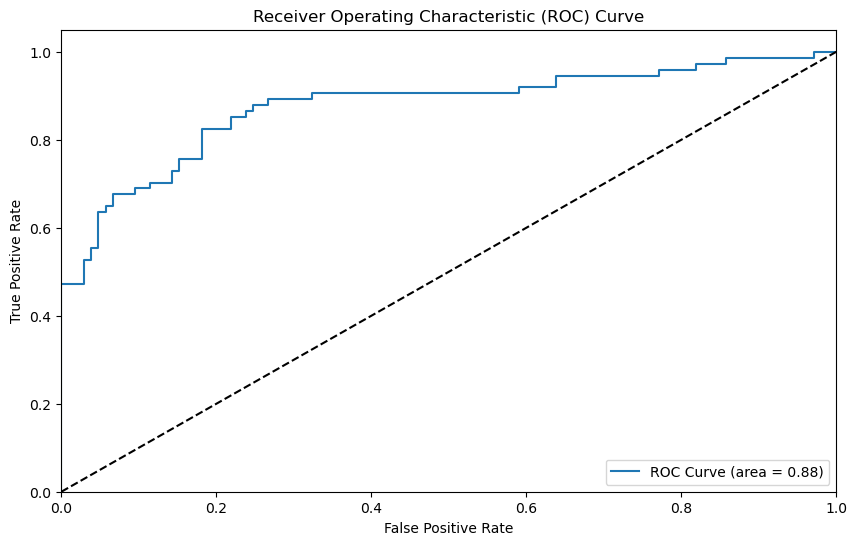

In [4]:
# Model Evaluation 


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the training dataset
train_df = pd.read_csv("C:\\Users\\mukes\\Downloads\\Logistic Regression\\Logistic Regression\\Titanic_train.csv")

# Data Preprocessing
# a. Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# b. Drop non-numeric or unnecessary columns
columns_to_drop = ['Name', 'Ticket', 'Cabin']  # Dropping columns that won't be used in the model
train_df.drop(columns=columns_to_drop, inplace=True)

# One-hot encode the categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
if 'Survived' not in train_df.columns:
    raise KeyError("'Survived' column not found in the DataFrame.")

X = train_df.drop(columns=['Survived'])  # Features
y = train_df['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [5]:
# Interpretation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset
train_df = pd.read_csv("C:\\Users\\mukes\\Downloads\\Logistic Regression\\Logistic Regression\\Titanic_train.csv")

# Data Preprocessing
# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# Drop non-numeric or unnecessary columns
columns_to_drop = ['Name', 'Ticket', 'Cabin']
train_df.drop(columns=columns_to_drop, inplace=True)

# One-hot encode the categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Interpret the coefficients
coefficients = model.coef_[0]  # Get the coefficients
feature_names = X.columns  # Get feature names

# Create a DataFrame for better visualization
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Calculate odds ratios
})

# Sort the coefficients by absolute value
coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False).drop('Absolute Coefficient', axis=1)

# Display the coefficients and odds ratios
print(coeff_df)

# Discuss significance of features
print("\nInterpretation:")
for _, row in coeff_df.iterrows():
    feature = row['Feature']
    coefficient = row['Coefficient']
    odds_ratio = row['Odds Ratio']
    
    if coefficient > 0:
        print(f"A unit increase in {feature} is associated with an increase in the log-odds of survival by {coefficient:.4f}, "
              f"which translates to an increase in odds of survival by a factor of {odds_ratio:.4f}.")
    else:
        print(f"A unit increase in {feature} is associated with a decrease in the log-odds of survival by {coefficient:.4f}, "
              f"which translates to a decrease in odds of survival by a factor of {odds_ratio:.4f}.")


       Feature  Coefficient  Odds Ratio
6     Sex_male    -2.593654    0.074746
1       Pclass    -0.949351    0.386992
8   Embarked_S    -0.303129    0.738504
3        SibSp    -0.290399    0.747965
7   Embarked_Q     0.136407    1.146149
4        Parch    -0.116219    0.890280
2          Age    -0.030381    0.970076
5         Fare     0.002765    1.002769
0  PassengerId     0.000392    1.000392

Interpretation:
A unit increase in Sex_male is associated with a decrease in the log-odds of survival by -2.5937, which translates to a decrease in odds of survival by a factor of 0.0747.
A unit increase in Pclass is associated with a decrease in the log-odds of survival by -0.9494, which translates to a decrease in odds of survival by a factor of 0.3870.
A unit increase in Embarked_S is associated with a decrease in the log-odds of survival by -0.3031, which translates to a decrease in odds of survival by a factor of 0.7385.
A unit increase in SibSp is associated with a decrease in the log-o

C:\Users\mukes\AppData\Local\Temp\ipykernel_14848\3981504141.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\mukes\AppData\Local\Temp\ipykernel_14848\3981504141.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [ ]:
1. What is the difference between precision and recall?

Precision: It measures the accuracy of positive predictions.

The ratio of true positives to total positive predictions. 

For example, if a model predicts 100 trees and 90 are correct, the precision is 90%

Recall: It measures the completeness of positive predictions.

The ratio of true positives to total actual positive instances. 

For example, if a model identifies 5 out of 12 spam emails, the recall is 41.7%.

2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data.
    
Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

Cross Validation is commonly used in Machine Learning to compare different models and select the most appropriate one for a specific problem. 
    
It is both easy to understand, easy to implement, and less biased than other methods.